In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [2]:
dr5 = pd.read_parquet('dr5_volunteer_checks.parquet')
dr2 = pd.read_parquet('dr12_volunteer_checks.parquet')

Text(0, 0.5, 'N > 1000')

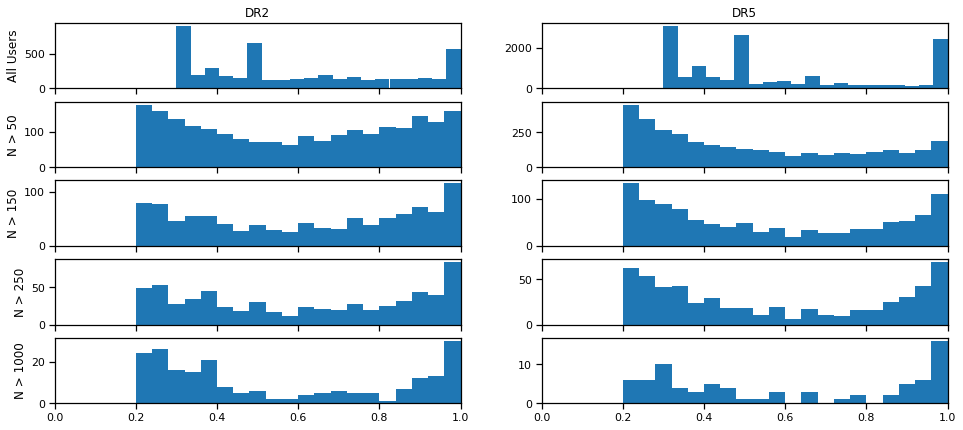

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(16, 7))
bins = 20
r = (.2, 1.)

axes[0][0].set_xlim([0., 1.])

axes[0][0].hist(dr2['artifact_fraction'], bins=bins, range=(0.3, 1.), label='All')
axes[1][0].hist(dr2.query('count > 50')['artifact_fraction'], bins=bins, range=r, label='50')
axes[2][0].hist(dr2.query('count > 150')['artifact_fraction'], bins=bins, range=r, label='N > 150')
axes[3][0].hist(dr2.query('count > 250')['artifact_fraction'], bins=bins, range=r, label='N > 250')
axes[4][0].hist(dr2.query('count > 1000')['artifact_fraction'], bins=bins, range=r, label='N > 1000')
axes[0][0].set_title('DR2')


axes[0][1].hist(dr5['artifact_fraction'], bins=bins, range=(0.3, 1.), label='All')
axes[1][1].hist(dr5.query('count > 50')['artifact_fraction'], bins=bins, range=r, label='50')
axes[2][1].hist(dr5.query('count > 150')['artifact_fraction'], bins=bins, range=r, label='N > 150')
axes[3][1].hist(dr5.query('count > 250')['artifact_fraction'], bins=bins, range=r, label='N > 250')
axes[4][1].hist(dr5.query('count > 1000')['artifact_fraction'], bins=bins, range=r, label='N > 1000')
axes[0][1].set_title('DR5')

axes[0][0].set_ylabel('All Users')
axes[1][0].set_ylabel('N > 50')
axes[2][0].set_ylabel('N > 150')
axes[3][0].set_ylabel('N > 250')
axes[4][0].set_ylabel('N > 1000')

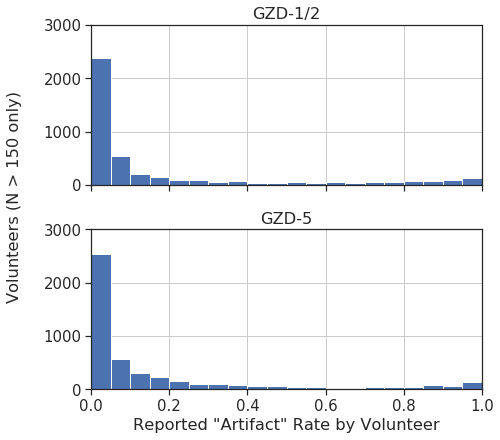

In [10]:

sns.set(font_scale=1.35, context='notebook')
sns.set_style('ticks')
fig, axes = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(7, 6.4))
bins = 20
r = (.0, 1.)
axes[0].hist(dr2.query('count > 150')['artifact_fraction'], bins=bins, range=r, label='N > 150')
axes[1].hist(dr5.query('count > 150')['artifact_fraction'], bins=bins, range=r, label='N > 150')
# axes[0].set_xlabel('Artifact Fraction')
axes[1].set_xlabel('Reported "Artifact" Rate by Volunteer')
# axes[1].set_ylabel('                 ')
fig.text(.0, 0.55, 'Volunteers (N > 150 only)', va='center', rotation='vertical')
axes[0].set_title('GZD-1/2')
axes[1].set_title('GZD-5')
axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].grid()
axes[1].grid()  # alpha=.75

# axes[0].edgecolor

axes[0].set_ylim([0., 3000])

plt.xlim([0., 1.])
fig.tight_layout()
# axes[0].axvline(.5, linestyle='--', color='r', alpha=.5)
# axes[1].axvline(.5, linestyle='--', color='r', alpha=.5)
plt.savefig('gzd_artifact_hists.png')
plt.savefig('gzd_artifact_hists.pdf')
